<a href="https://colab.research.google.com/github/SauravSinghRawat9084/High-Frequency-Trading-/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.python.client import device_lib

# Print the list of devices, including GPUs
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10797025290541722394
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14410383360
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17203790600953608730
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/ #copy json file to kaggle directory

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

 99% 3.08G/3.10G [00:28<00:00, 68.5MB/s]
100% 3.10G/3.10G [00:28<00:00, 115MB/s] 


In [ ]:
!mkdir "/content/train"
!unzip breast-histopathology-images.zip -d  "/content/train"


Streaming output truncated to the last 5000 lines.
  inflating: /content/train/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: /content/train/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: /content/train/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: /content/train/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: /content/train/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: /content/train/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: /content/train/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: /content/train/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: /content/train/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: /content/train/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: /content/train/I

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
from keras.applications.vgg16 import VGG16
import keras_tuner as kt
import tensorflow as tf
from keras.applications.vgg16 import preprocess_input

In [ ]:
breast_img = glob.glob('/content/train/IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [ ]:
len(breast_img)

277524

In [ ]:
data=[]
label=[]
c=0
b=0
for i in breast_img:
  a=cv2.imread(i,cv2.IMREAD_COLOR)
  a=cv2.resize(a, (224, 224), interpolation = cv2.INTER_LINEAR)

  if i[-5]=='0'and b<=75000:

    label.append(0)
    data.append(a)
    b+=1
  elif  i[-5]=='1' and c<=75000:
     label.append(1)
     data.append(a)
     c+=1
  if b>=75000 and c>=75000:
     break

In [ ]:
data[0]

In [ ]:
data=np.array(data)
label=np.array(label)

In [ ]:
data.shape,label.shape

((20000, 224, 224, 3), (20000,))

In [ ]:
data[0]

In [ ]:
# data=data[:100000]
# label=label[:100000]

In [ ]:
data.shape

(10002, 224, 224, 3)

In [ ]:
unique_values, counts = np.unique(label, return_counts=True)
for i in range(len(counts)):
  print(unique_values[i],counts[i])

0 10000
1 10000


In [ ]:
# unique_values=['Non IDC','IDC']


In [ ]:
# plt.bar(unique_values,counts,color=['Blue','red'])
# # Adding labels and a title
# plt.xlabel('State of Cancer')
# plt.ylabel('Number of Patients')
# plt.title('Number of Patients with no cancer and cancer')

# # Display the bar chart
# plt.show()

(277524, 50, 50, 3)


In [ ]:
# # Create a figure with 5 rows and 5 columns to display 25 images
# sh = np.random.randint(0, len(label),25)

# fig = plt.figure(figsize=(12, 12))
# s=1
# for i in sh:
#     plt.subplot(5, 5, s)
#     plt.imshow(data[i])
#     if label[i]==0:
#      plt.title('Non IDC')
#     else:
#      plt.title('IDC')
#     plt.axis('off')
#     s+=1


# # Show the plot
# plt.show()

In [ ]:
data= preprocess_input(data)

In [ ]:
data.shape

In [ ]:
data[0]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,label,random_state=42,test_size=0.25)

In [ ]:
x_test.shape,y_train.shape

((2501, 224, 224, 3), (7501,))

In [ ]:
y_train=tf.one_hot(y_train,2)
y_test=tf.one_hot(y_test,2)

In [ ]:
y_train

<tf.Tensor: shape=(15000, 2), dtype=float32, numpy=
array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)>

In [ ]:
x_train.shape,y_train.shape

((15000, 224, 224, 3), TensorShape([15000, 2]))

In [ ]:
print(y_train)

tf.Tensor(
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]], shape=(7501, 2), dtype=float32)


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))

In [ ]:
# i.e. freeze all convolutional VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20)

In [ ]:
'''byahi tak bas'''

In [ ]:
# def build_model(hp):
#     model = keras.Sequential()
#     c=0
#     # Add convolutional layers
#     for i in range(hp.Int('convolayer', 3, 8)):
#         if c == 0:
#             model.add(keras.layers.Conv2D(filters=hp.Int('Filter' + str(i), 32,128, step=32),
#                                           kernel_size=3,
#                                           padding='same',
#                                           activation='relu',
#                                           input_shape=(224, 224, 3)))
#             model.add(keras.layers.MaxPooling2D((2, 2),padding="VALID",strides =2))
#         else:
#             model.add(keras.layers.Conv2D(filters=hp.Int('Filter' + str(i), 32, 128, step=32),
#                                           kernel_size=3,
#                                           padding='same',
#                                           activation='relu'))
#             model.add(keras.layers.MaxPooling2D((2, 2),padding="VALID",strides =2))

#         c=c+1
#     model.add(keras.layers.Flatten())
#     # Add dense layers
#     for j in range(hp.Int('Denselayer',1,5)):
#        model.add(keras.layers.Dense(hp.Int('dense'+str(i),64,160), activation = 'relu'))

#     model.add(keras.layers.Dense(2, activation='sigmoid'))

#     # Compile the model
#     model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

#     return model


In [ ]:
def build_model(hp):
    model = keras.Sequential()
    c=0
    # Add convolutional layers
    for i in range(hp.Int('convolayer', 3, 8)):
        if c == 0:
            model.add(keras.layers.Conv2D(filters=hp.Int('Filter' + str(i), 32,128, step=32),
                                          kernel_size=3,
                                          padding='same',
                                          activation='relu',
                                          input_shape=(224, 224, 3)))
            model.add(keras.layers.MaxPooling2D((2, 2),padding="VALID",strides =2))
        else:
            model.add(keras.layers.Conv2D(filters=hp.Int('Filter' + str(i), 32, 128, step=32),
                                          kernel_size=3,
                                          padding='same',
                                          activation='relu'))
            model.add(keras.layers.MaxPooling2D((2, 2),padding="VALID",strides =2))

        c=c+1
    model.add(keras.layers.Flatten())
    # Add dense layers
    model.add(keras.layers.Dense(128, activation = 'relu'))

    model.add(keras.layers.Dense(2, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 1 Complete [00h 00m 00s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 00s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
3                 |8                 |convolayer
64                |96                |Filter0
96                |96                |Filter1
32                |64                |Filter2
32                |32                |Filter3
96                |32                |Filter4
96                |32                |Filter5
64                |32                |Filter6
128               |32                |Filter7



In [ ]:
best_hyperparameter = tuner.get_best_hyperparameters()[0].values
best_hyperparameter

In [ ]:
best_model=tuner.get_best_models(num_models=1)[0]


In [ ]:
best_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50, initial_epoch=5)

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = best_model.predict(x_test)
print(Y_pred)

79/79 [==============================] - 3s 27ms/step
[[2.5070395e-04 9.9977034e-01]
 [8.4137974e-12 1.0000000e+00]
 [1.7914409e-02 9.8371255e-01]
 ...
 [1.5119437e-06 9.9999893e-01]
 [1.6738851e-01 8.4857905e-01]
 [4.8554102e-11 1.0000000e+00]]


In [ ]:
print(y_test)

[0 1 0 ... 0 1 1]


In [ ]:
print(len(Y_pred))

39394


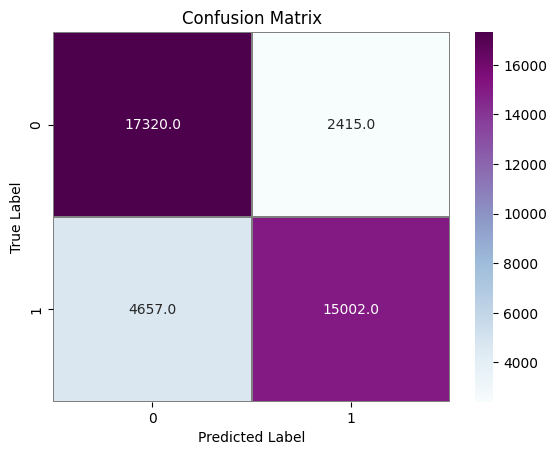

In [ ]:
confusion_mtx = confusion_matrix(y_test, Y_pred)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
